# Part 1: Extracting data


## 1.1 Download per-protein annotations from Uniprot
To download information from Uniprot, as we've seen you can get all information for an entry as XML or JSON file. This is useful because it contains all available information for that protein.

However, if we are only interested in a couple of features for a big list of proteins, it would be a lot of extra overhead to first download all the big files, and then pull out a small amount of data from them. Therefore, Uniprot provided the tab format. This a plain text file where every column depicts one feature and each row is an entry. You can easily parse these files with Python libraries to deal with data files like pandas, or even open them with excel. We will see how to manipulate data with Pandas in the next WPO.

For a set of proteins listed in a multiple sequence alignment, we will have to provide a search query, but in addition you also have to provide a list columns you are interested in. To know which columns you can choose from, please follow this link. As you can see, there are a lot of features, so we will have to decide which ones we will pursue for analysis.

### The code block below then gets the information from the Uniprot web service.
If you run into problems with 'ModuleNotFoundError', notably for 'pandas', you have to open your conda terminal (on Windows) or open a terminal window (on Mac/Linux), and type:

```conda install pandas```

That should install the code for you.

You also have to change the name of the file with your alignment in below code block, go to 'Cell' and click 'Run all'.

Also play around with the ```columns``` in below code to see which information you can download, and what could be interesting to use.

The data is saved in a local file called ```proteins.tab``` - you can also change that file name to save into a different file.

In [1]:
from apiFunctions import uniprotDownload, enaDownload
import pandas as pd
from functions import extractFastaInfo

# Comment out the line below that you don't want to use, and change the filename!
# Note that the file has to be in the same directory as this Jupyter file
# Extract Ids from FASTA
(seqAlignInfo,seqIds) = extractFastaInfo("fastaAlignment.fasta")

"""
# Extract Ids from CLUSTAL
(seqAlignInfo,seqIds) = extractClustalInfo("clustalExample.aln")
"""

# Information for API
fileName="proteins.tab"
query="id:"+"+OR+id:".join(seqIds)
format="tab"

# You can find possible columns on this page https://www.uniprot.org/help/uniprotkb_column_names
columns="id,entry name,genes,organism,comment(PTM),3d,database(EMBL),database(GenBank),database(GeneID),lineage(all)"

# Download File
uniprotDownload(fileName,query=query, format=format, columns=columns)

# Show with Pandas
proteinInfo = pd.read_csv(fileName, sep="\t").set_index("Entry").sort_index()
proteinInfo

Removing Uniref sequence UniRef90_UPI0004D06868, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI00017735F2, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI0003331A04, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI00062A9032, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI0007197059, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI0003346AAE, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI00077DB2F5, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI00033185BD, does not have uniprot info available
Removing sequence UniRef90_UPI000B510A3B, contains X character
Removing Uniref sequence UniRef90_UPI00032B1BE8, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI0007A6B7A1, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI00101A7722, does not have uniprot info a

,Entry name,Gene names,Organism,Post-translational modification,3D,Cross-reference (EMBL),Cross-reference (GenBank),Cross-reference (GeneID),Taxonomic lineage (all)
Entry,,,,,,,,,
A0A0K1TP12,A0A0K1TP12_NANGA,p53,Nannospalax galili (Northern Israeli blind sub...,NaN,NaN,KP799008;,NaN,103752115;,"cellular organisms, Eukaryota, Opisthokonta, M..."
A0A172Q425,A0A172Q425_MICOH,p53,Microtus ochrogaster (Prairie vole),NaN,NaN,KU159768;,NaN,101978980;,"cellular organisms, Eukaryota, Opisthokonta, M..."
A0A1S3EYC1,A0A1S3EYC1_DIPOR,Tp53,Dipodomys ordii (Ord's kangaroo rat),NaN,NaN,NaN,NaN,105983546;,"cellular organisms, Eukaryota, Opisthokonta, M..."
A0A1U7U5H4,A0A1U7U5H4_TARSY,TP53,Tarsius syrichta (Philippine tarsier),NaN,NaN,NaN,NaN,103264637;,"cellular organisms, Eukaryota, Opisthokonta, M..."
A0A1U9W5F4,A0A1U9W5F4_MASCO,NaN,Mastomys coucha (Southern multimammate mouse) ...,NaN,NaN,KY626317;,NaN,NaN,"cellular organisms, Eukaryota, Opisthokonta, M..."
A0A250YHC8,A0A250YHC8_CASCN,TP53,Castor canadensis (American beaver),NaN,NaN,GFFW01001788;,NaN,109674834;,"cellular organisms, Eukaryota, Opisthokonta, M..."
A0A2I2Y7Z8,A0A2I2Y7Z8_GORGO,NaN,Gorilla gorilla gorilla (Western lowland gorilla),NaN,NaN,NaN,NaN,NaN,"cellular organisms, Eukaryota, Opisthokonta, M..."
A0A2I3MD32,A0A2I3MD32_PAPAN,TP53,Papio anubis (Olive baboon),NaN,NaN,NaN,NaN,NaN,"cellular organisms, Eukaryota, Opisthokonta, M..."
A0A2I3NCU7,A0A2I3NCU7_PAPAN,TP53,Papio anubis (Olive baboon),NaN,NaN,NaN,NaN,NaN,"cellular organisms, Eukaryota, Opisthokonta, M..."


## 1.2 Getting all Biopython data for your sequences

We still need to generate and save all the data for the Biopython predictions, that is done in code below. We are doing the same as in the previous Jupyter page, but are now looping over all sequences, keeping track of that information, and saving it in a JSON file.

In [2]:
import json

from Bio.SeqUtils.ProtParam import ProteinAnalysis
from functions import extractFastaInfo

# Comment out the line below that you don't want to use, and change the filename, as in the other Jupyter sheet!
# Note that the file has to be in the same directory as this Jupyter file
# Extract Ids from FASTA
(seqAlignInfo,seqIds) = extractFastaInfo("fastaAlignment.fasta")
# Extract Ids from CLUSTAL
#(seqAlignInfo,seqIds) = extractClustalInfo("clustalExample.aln")

# Now we are going to calculate all the biopython features for all sequences, and save the result in a JSON file
# that we can later load again
seqsDict = {}
for seqId in seqAlignInfo.keys():
    # Here we take out all the gaps '-' from the sequences, otherwise they won't be predicted correctly!
    seqsDict[seqId] = seqAlignInfo[seqId].replace("-","")

# This is a python list with all the Uniprot IDs of the sequences in the MSA
seqIds = list(seqsDict.keys())

# This is a python dictionary that we will use to store all biopython calculated information.
# We here already set up all the labels (keys in python terminology) to store the different types of data
biopythonInformation = {
    
    'aminoAcidNumbers': {},
    'aminoAcidFractions': {},
    'molecularWeights': {},
    'aromaticity': {},
    'instability': {},
    'isoelectricPoint': {},
    'flexibility': {},
    'helixFraction': {},
    'sheetFraction': {},
    'coilFraction': {}

}

# Here 'looping' over all the sequences and calculating the relevant information
for seqId in seqIds:
    
    # See last Jupyter page, this is Biopython code
    x = ProteinAnalysis(seqsDict[seqId])
    secStruc = x.secondary_structure_fraction()
    
    # Here there will be twenty values, one per amino acid type
    biopythonInformation['aminoAcidNumbers'][seqId] = x.count_amino_acids()
    biopythonInformation['aminoAcidFractions'][seqId] = x.get_amino_acids_percent()
    
    # These are per-protein values, so only one per protein
    biopythonInformation['molecularWeights'][seqId] = x.molecular_weight()
    biopythonInformation['aromaticity'][seqId] = x.aromaticity()
    biopythonInformation['instability'][seqId] = x.instability_index()
    biopythonInformation['isoelectricPoint'][seqId] = x.isoelectric_point()
    
    # Here we access the secondary structure fraction information from the secStruc
    # list, so [0] is the first element, [1] the second, ...
    biopythonInformation['helixFraction'][seqId] = secStruc[0]
    biopythonInformation['sheetFraction'][seqId] = secStruc[1]
    biopythonInformation['coilFraction'][seqId] = secStruc[2]

    # The flexibility are per-residue values, so one per amino acid in the sequence.
    # This calculates 9 values less than there actually are in the sequence, so cannot be 
    # directly connected to the dynaMine data. The first five and last four residues are missing.
    biopythonInformation['flexibility'][seqId] = x.flexibility()
    
print(biopythonInformation)

# The info will be stored in this file
outFile = 'biopython.json'
with open(outFile, 'w+') as outfile:
        json.dump(biopythonInformation, outfile, indent=4)
        

Removing Uniref sequence UniRef90_UPI0004D06868, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI00017735F2, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI0003331A04, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI00062A9032, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI0007197059, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI0003346AAE, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI00077DB2F5, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI00033185BD, does not have uniprot info available
Removing sequence UniRef90_UPI000B510A3B, contains X character
Removing Uniref sequence UniRef90_UPI00032B1BE8, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI0007A6B7A1, does not have uniprot info available
Removing Uniref sequence UniRef90_UPI00101A7722, does not have uniprot info a

## 1.3 Get per-residue predictions via an API
We can then also get other types of information, for example predictions of the protein behavior. In this case, we have to map back the information from the prediction (which works on an uninterrupted protein sequence) to the multiple sequence alignment to create a matrix of information that relates to the multiple sequence alignment itself.

In [4]:
import requests
import json
import time

WAIT_TIME = 5
TOTAL_TIME = 300

def createInputJson(seqsDict, outFile):
    
    #Create dict of form scaffold:sequence, filter out gaps from MSA itself
    
    with open(outFile, 'w+') as outfile:
        json.dump(seqsDict, outfile, indent=4)

def getDataFromDisoMine(inputFile,outputFile):

    # Read input Json file
    file = open(inputFile, 'r')
    inputData = file.read()
    request_json = json.dumps(json.loads(inputData))
    request_json = request_json[:-1] + ', "extra_predictions":"true"}'
    
    # API Post URL
    post_url = "http://bio2byte.be/disomine/api/"

    # Make POST request with Json Input body
    # WV 190206 - ADDED the 'data =' in below for it to work on Python dictionary
    response = requests.post(post_url, json = request_json)
    
    queue_id = str(response.json()['queue_id'])
    
    # Validating Response Code
    assert response.status_code == 202
    
    print("Submitted with queue ID: {}...".format(queue_id))
        
    # Now get results - this will happen when results available or when time limit reached
    time_waited = 0    
    get_url = "http://bio2byte.be/disomine/api/queue/"
    
    while time_waited / TOTAL_TIME < 1.0:

      # Get Request
      response = requests.get(get_url + queue_id)
      
      if response.status_code == 202:
        print("  Waiting for results...")

      elif response.status_code == 200:
        queryResults = json.loads(response.text)
        break
       
      else:
        print("Server error, response {}.".format(response.status_code))
        break
      
      time.sleep(WAIT_TIME)
      time_waited += WAIT_TIME

    # save the results to a json file
    predJsonData = json.dumps(queryResults)
    f = open(outputFile, "w")
    f.write(predJsonData)
    f.close()

    return queryResults


seqJsonFile = 'sequences.json'
predJsonFile = 'predictions.json'

createInputJson(seqsDict,seqJsonFile)
results = getDataFromDisoMine(seqJsonFile,predJsonFile)
    
print(results)

Submitted with queue ID: 10660...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for re

UnboundLocalError: local variable 'queryResults' referenced before assignment

## 1.4 Calculating pairwise sequence distances

Here we generate the distances between the sequences based on a pairwise alignment. You can change gap penalties, as well as the scoring matrix, in below if you want to change the settings.

In [3]:
from Bio import Align
from Bio.Align import substitution_matrices

# Set up the alignment procedure. You can modify the parameters, up to you how to calculate the distances between
# sequences
aligner = Align.PairwiseAligner()
aligner.open_gap_score=-6
aligner.extend_gap_score=-2
aligner.substitution_matrix = substitution_matrices.load("BLOSUM62") # Other default matrices are available as well
aligner.mode = 'global' # Can be 'local', 'global'

# We now have to calculate all the pairwise scores between sequences, so we are comparing all sequences to all other
# sequences. Try some print() statements in there to see what's going on if you want to understand the code

sequenceDistances = {}
lowestValue = 999999
for firstSeqIndex in range(len(seqIds)-1):
    firstSeqId = seqIds[firstSeqIndex]
    if firstSeqId not in sequenceDistances.keys():
        sequenceDistances[firstSeqId] = {}
    for secondSeqIndex in range(firstSeqIndex+1,len(seqIds)):
        secondSeqId = seqIds[secondSeqIndex]
        alignments = aligner.align(seqsDict[firstSeqId], seqsDict[secondSeqId])
        
        alignmentScore = alignments[0].score
        
        if lowestValue > alignmentScore:
            lowestValue = alignmentScore
        
        # Keeping track of both combinations, might not be necessary
        sequenceDistances[firstSeqId][secondSeqId] = alignmentScore
        
        if secondSeqId not in sequenceDistances.keys():
            sequenceDistances[secondSeqId] = {}
        sequenceDistances[secondSeqId][firstSeqId] = alignmentScore

        print(firstSeqId, secondSeqId, alignmentScore)
        #print(alignment[0])

#
# Rescale matrix if lowest value is negative
#

if lowestValue < 0:
    for seqId1 in sequenceDistances.keys():
        for seqId2 in sequenceDistances[seqId1].keys():
            sequenceDistances[seqId1][seqId2] -= lowestValue
        
# The info will be stored in this file
# For the SPSS analysis, you can use the distance matrix directly using the procedure described here:
#   https://www.ibm.com/support/pages/cluster-distance-matrix-input
#
outFile = 'seqDistances_1.json'
with open(outFile, 'w+') as outfile:
        json.dump(sequenceDistances, outfile, indent=4)

D1FD89 P04637 2121.0
D1FD89 P56423 2038.0
D1FD89 Q9TTA1 1970.0
D1FD89 A0A2K5RMZ8 1902.0
D1FD89 A0A1U7U5H4 1850.0
D1FD89 J3KP33 1719.0
D1FD89 O36006 1800.0
D1FD89 Q95330 1796.0
D1FD89 A0A2R8MYD9 1788.0
D1FD89 A0A0K1TP12 1770.0
D1FD89 A0A2I2Y7Z8 1584.0
D1FD89 A0A2I3MD32 1639.0
D1FD89 A0A2I3NCU7 1650.0
D1FD89 G5B5D6 1733.0
D1FD89 A0A250YHC8 1725.0
D1FD89 A0A172Q425 1724.0
D1FD89 H0XGB0 1706.0
D1FD89 Q9TUB2 1694.0
D1FD89 P41685 1664.0
D1FD89 A0A671EZ36 1679.0
D1FD89 Q29537 1661.0
D1FD89 L8IPI8 1652.0
D1FD89 P67939 1644.0
D1FD89 Q9WUR6 1621.0
D1FD89 P51664 1614.0
D1FD89 A0A5N3X1K5 1618.0
D1FD89 A0A2Y9R5B9 1617.0
D1FD89 O09185 1605.0
D1FD89 F6TL72 1601.0
D1FD89 A0A452QA89 1589.0
D1FD89 L5JZ91 1584.0
D1FD89 A0A1S3EYC1 1535.0
D1FD89 P10361 1580.0
D1FD89 A0A4X1V650 1587.0
D1FD89 P02340 1566.0
D1FD89 Q920Y0 1576.0
D1FD89 A0A1U9W5F4 1544.0
P04637 P56423 2038.0
P04637 Q9TTA1 1970.0
P04637 A0A2K5RMZ8 1902.0
P04637 A0A1U7U5H4 1850.0
P04637 J3KP33 1719.0
P04637 O36006 1800.0
P04637 Q95330 1796.0
P046

A0A2I3NCU7 A0A5N3X1K5 1291.0
A0A2I3NCU7 A0A2Y9R5B9 1274.0
A0A2I3NCU7 O09185 1308.0
A0A2I3NCU7 F6TL72 1238.0
A0A2I3NCU7 A0A452QA89 1205.0
A0A2I3NCU7 L5JZ91 1260.0
A0A2I3NCU7 A0A1S3EYC1 1233.0
A0A2I3NCU7 P10361 1250.0
A0A2I3NCU7 A0A4X1V650 1226.0
A0A2I3NCU7 P02340 1231.0
A0A2I3NCU7 Q920Y0 1282.0
A0A2I3NCU7 A0A1U9W5F4 1220.0
G5B5D6 A0A250YHC8 1765.0
G5B5D6 A0A172Q425 1701.0
G5B5D6 H0XGB0 1669.0
G5B5D6 Q9TUB2 1714.0
G5B5D6 P41685 1658.0
G5B5D6 A0A671EZ36 1648.0
G5B5D6 Q29537 1632.0
G5B5D6 L8IPI8 1671.0
G5B5D6 P67939 1676.0
G5B5D6 Q9WUR6 1842.0
G5B5D6 P51664 1654.0
G5B5D6 A0A5N3X1K5 1670.0
G5B5D6 A0A2Y9R5B9 1587.0
G5B5D6 O09185 1591.0
G5B5D6 F6TL72 1562.0
G5B5D6 A0A452QA89 1550.0
G5B5D6 L5JZ91 1591.0
G5B5D6 A0A1S3EYC1 1600.0
G5B5D6 P10361 1624.0
G5B5D6 A0A4X1V650 1593.0
G5B5D6 P02340 1581.0
G5B5D6 Q920Y0 1608.0
G5B5D6 A0A1U9W5F4 1586.0
A0A250YHC8 A0A172Q425 1714.0
A0A250YHC8 H0XGB0 1655.0
A0A250YHC8 Q9TUB2 1661.0
A0A250YHC8 P41685 1613.0
A0A250YHC8 A0A671EZ36 1604.0
A0A250YHC8 Q29537 1612.0

## 1.5 Connecting data from different files

The key here is to use the unique Uniprot identifiers to connect information from the files, below we do this to combine all data into a single dataframe

In [4]:
import json
import pandas as pd

# Load in the data files we generated - note that you can always update these by running
# one of the previous cells. Make sure you keep a copy of the original though, just in case
# things go wrong

#
# The csv file from uniprot
#
fileName = "proteins.tab"
proteinData = pd.read_csv(fileName, sep="\t").set_index("Entry").sort_index()

#
# The predictions from DynaMine, ...
#
dynaminePredFile = 'predictions.json'
file = open(dynaminePredFile, 'r')
input = file.read()
dynamineRawData = json.loads(input)
# Reorganising this data bit to make it easier to use
dynaMineData = {}
dynaMineValueTypes = ['disomine', 'backbone', 'sidechain', 'efoldmine']
for dynaMineValueType in dynaMineValueTypes:
    dynaMineData[dynaMineValueType] = {}
    
for resultDict in dynamineRawData['results']:
    proteinID = resultDict['proteinID']
    for dynaMineValueType in dynaMineValueTypes:
        dynaMineData[dynaMineValueType][proteinID] = resultDict[dynaMineValueType]

#
# The biopython data
#
bioPythonFile = 'bioPython.json'
file = open(bioPythonFile, 'r')
input = file.read()
bioPythonData = json.loads(input)

#
# The sequence distance data - is not used here because it relates to two proteins at the
# same time (is a matrix, essentially)
#
seqDistanceFile ='seqDistances_1.json'
file = open(seqDistanceFile, 'r')
input = file.read()
seqDistData = json.loads(input)


# The uniprot identifiers are shared, so we can use that to add information to the pandas dataframe
# from uniprot. We can in fact store most information in there, except for the sequence distance matrix,
# which we will have to treat differently.

# This gets the keys from the pandas dataframe
uniprotKeys = proteinData.index.values.tolist()

# We add first the data from disoMine/dynaMine, then biopython
for dictToAdd in (dynaMineData,bioPythonData):
    
    # These are the data labels for each dataset
    dataLabels = dictToAdd.keys()
    print(dataLabels)
    
    # We enter the data into the saveframe per data type
    for dataLabel in dataLabels:
        dataList = []
        
        # We get the data per uniprot ID, in the same order as in the pandas dataframe, to
        # create a list of values
        for uniprotKey in uniprotKeys:
            dataList.append(dictToAdd[dataLabel][uniprotKey])
        
        # We then add this list of values to the pandas dataframe, and now have the data available in there
        proteinData[dataLabel] = dataList

dict_keys(['disomine', 'backbone', 'sidechain', 'efoldmine'])
dict_keys(['aminoAcidNumbers', 'aminoAcidFractions', 'molecularWeights', 'aromaticity', 'instability', 'isoelectricPoint', 'flexibility', 'helixFraction', 'sheetFraction', 'coilFraction'])


## 1.6 Exporting data for SPSS

We can use the same data preparation, but then output files for SPSS to work with the statistical test in there. Here a couple of examples

If you run into problems with 'ModuleNotFoundError' for 'pyreadstat', you have to open your conda terminal (on Windows) or open a terminal window (on Mac/Linux), and type:
```conda install -c conda-forge pyreadstat```


In [5]:
import pyreadstat
import numpy

# First we make a copy of the pandas dataframe, as we need to modify it
# in order to get all the data across to SPSS
proteinDataCopy = proteinData.copy()

# SPSS does not accept all characters in column names, so doing some renaming here
# Should you get an 'ReadstatError: A provided name contains an illegal character' error,
# check if you added any Uniprot fields that have spaces or 'weird' characters in them
# and remap them here.
proteinDataCopy.rename(columns={"Entry name": "uniprotID",
                            "Gene names": "geneNames",
                            "3D": "StructureAvailable",
                            "Post-translational modification": "PTM",
                            "Cross-reference (EMBL)": "EMBL",
                            "Cross-reference (GenBank)": "GenBank",
                            "Cross-reference (GeneID)": "GeneID",
                            "Taxonomic lineage": "TaxonomicLineage",
                            "Taxonomic lineage (all)": "TaxonomicLineageAll",
                            "Function [CC]": "functionCC",
                            "Interacts with": "interactsWith",
                            "Domain [CC]": "domainCC",
                            "Protein families": "proteinFamilies"
                           },inplace=True)

# Instead of giving SPSS the list of the predicted values for all residues per protein,
# we are here calculating the mean value for that list, so that we end up with a single
# value for each protein. This can then be used for, for example, PCA or cluster analysis
# In addition, for the amino acids a separate column has to be made, as SPSS cannot deal
# with the Python dictionaries
for dataName in proteinDataCopy.columns:
    dataValuesList = proteinDataCopy[dataName]
    # Check whether this is a list of values
    if type(dataValuesList[0]) == type([]):
        # If this is a list, then take the mean value and replace the original values
        dataValuesList = [numpy.mean(dataList) for dataList in dataValuesList[:]]
        proteinDataCopy[dataName] = dataValuesList
        print(dataName,dataValuesList[0])
    elif type(dataValuesList[0]) == type({}):
        # If this is a dictionary, make new columns per dictionary entry with the values
        for aaKey in dataValuesList[0]:
            dataLabel = "{}_{}".format(dataName,aaKey)
            proteinDataCopy[dataLabel] = [dataList[aaKey] for dataList in dataValuesList]
            print(dataLabel, proteinDataCopy[dataLabel][0])
        # Removing the original column, no use for SPSS
        del(proteinDataCopy[dataName])
    else:  
        print(dataName,dataValuesList[0])

# Names of all the data columns
print(proteinDataCopy.columns)

# Dump all data
pyreadstat.write_sav(proteinDataCopy, 'proteinData.sav')

# Dump only specific columns of the data
pyreadstat.write_sav(proteinDataCopy[['helixFraction','sheetFraction','coilFraction']], 'proteinDataSubset.sav')


# Here we also reorganise the distance data for SPSS, and save it, so that you can do a clustering 
# analysis in SPSS using directly this distance data. Note that you can also do a clustering based
# on other characteristics from the proteinData.sav file!
distanceMatrix = pd.DataFrame.from_dict(sequenceDistances)
pyreadstat.write_sav(distanceMatrix, 'distanceMatrix.sav')


uniprotID A0A0K1TP12_NANGA
geneNames p53
Organism Nannospalax galili (Northern Israeli blind subterranean mole rat) (Spalax galili)
PTM nan
StructureAvailable nan
EMBL KP799008;
GenBank nan
GeneID 103752115;
TaxonomicLineageAll cellular organisms, Eukaryota, Opisthokonta, Metazoa, Eumetazoa, Bilateria, Deuterostomia, Chordata, Craniata, Vertebrata, Gnathostomata (jawed vertebrates), Teleostomi, Euteleostomi, Sarcopterygii, Dipnotetrapodomorpha, Tetrapoda, Amniota, Mammalia, Theria, Eutheria, Boreoeutheria, Euarchontoglires, Glires (Rodents and rabbits), Rodentia, Myomorpha (mice and others), Muroidea, Spalacidae, Spalacinae (blind mole-rats), Nannospalax (Mediterranean blind mole-rats), Nannospalax galili (Northern Israeli blind subterranean mole rat) (Spalax galili)
disomine 0.30123588804851104
backbone 0.737826598465473
sidechain 0.07936425471857188
efoldmine 0.21079795396419437
aminoAcidNumbers_A 19
aminoAcidNumbers_C 11
aminoAcidNumbers_D 21
aminoAcidNumbers_E 30
aminoAcidNumbers_F

# Part 2: Analysing data

## 2.1 Visualising prediction data with Python

Now we can start to use the data to make plots and analysis, below some examples that you can use as a template to do your own analyses.

If you run into problems with 'ModuleNotFoundError' for 'scipy', you have to open your conda terminal (on Windows) or open a terminal window (on Mac/Linux), and type:
```conda install scipy```


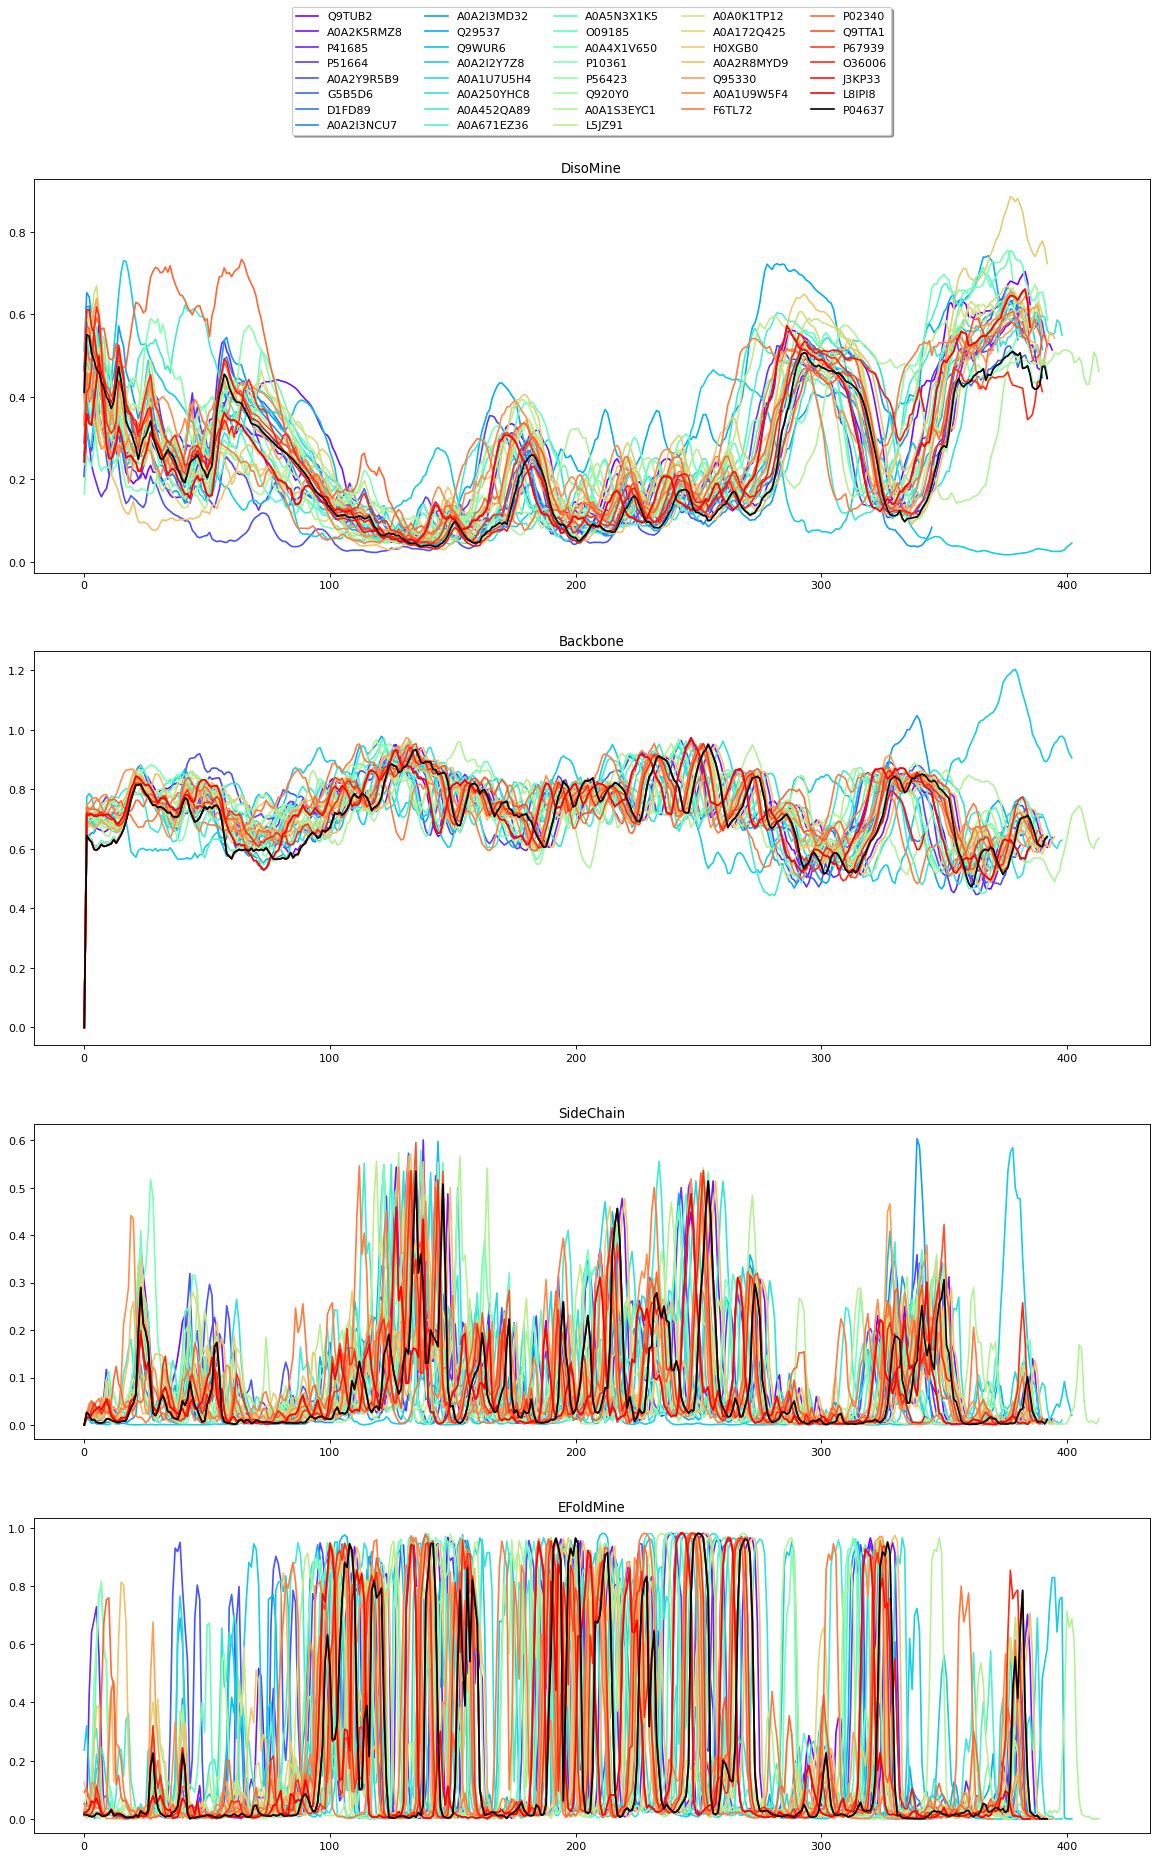

In [6]:
import matplotlib.pyplot as plt
import numpy
import json

# Read input Json file
file = open('predictions.json', 'r')
input = file.read()
request_json = json.loads(input)

#extracting the number of proteins
numberOfResults = len(request_json["results"])

# creating a plot
fig = plt.figure(figsize=(18, 30), dpi= 80, facecolor='w', edgecolor='k')

# creating a color palette for ploting
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in numpy.linspace(0, 1, numberOfResults)]

#In predictions.json file the ID of our protein is P04637
#ploting the DisoMine results
ourProteinIndex = 0
axes = fig.add_subplot(411)
for currentProteinIndex, color in enumerate(colors):
    seq = request_json["results"][currentProteinIndex]['sequence']
    disomine = request_json["results"][currentProteinIndex]['disomine']
    label = request_json["results"][currentProteinIndex]['proteinID']
    if label == 'P04637':
        ourProteinIndex = currentProteinIndex
    else:
        axes.plot(range(len(seq)), disomine, color=color, label=label)
#        print(request_json["results"][currentProteinIndex]['proteinID'], color)
#print(request_json["results"][ourProteinIndex]['proteinID'], "black")
axes.plot(range(len(request_json["results"][ourProteinIndex]['sequence'])), request_json["results"][ourProteinIndex]['disomine'], color="black", label='P04637')
axes.set_title("DisoMine")
axes.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45), fancybox=True, shadow=True, ncol=5)

#ploting the Backbone results
axes = fig.add_subplot(412)
for currentProteinIndex, color in enumerate(colors):
    seq = request_json["results"][currentProteinIndex]['sequence']
    backbone = request_json["results"][currentProteinIndex]['backbone']
    if currentProteinIndex != ourProteinIndex:
        axes.plot(range(len(seq)), backbone, color=color)
axes.plot(range(len(request_json["results"][ourProteinIndex]['sequence'])), request_json["results"][ourProteinIndex]['backbone'], color="black")
axes.set_title("Backbone")

#ploting the SideChain results
axes = fig.add_subplot(413)
for currentProteinIndex, color in enumerate(colors):
    seq = request_json["results"][currentProteinIndex]['sequence']
    sidechain = request_json["results"][currentProteinIndex]['sidechain']
    if currentProteinIndex != ourProteinIndex:
        axes.plot(range(len(seq)), sidechain, color=color)
axes.plot(range(len(request_json["results"][ourProteinIndex]['sequence'])), request_json["results"][ourProteinIndex]['sidechain'], color="black")
box = axes.get_position();
axes.set_position([box.x0, box.y0 + box.height*0.2, box.width, box.height*0.8])
axes.set_title("SideChain")

#ploting the EFoldMine results
axes = fig.add_subplot(414)
for currentProteinIndex, color in enumerate(colors):
    seq = request_json["results"][currentProteinIndex]['sequence']
    efoldmine = request_json["results"][currentProteinIndex]['efoldmine']
    if currentProteinIndex != ourProteinIndex:
        axes.plot(range(len(seq)), efoldmine, color=color)
axes.plot(range(len(request_json["results"][ourProteinIndex]['sequence'])), request_json["results"][ourProteinIndex]['efoldmine'], color="black")
box = axes.get_position();
axes.set_position([box.x0, box.y0 + box.height*0.4, box.width, box.height*0.8])
axes.set_title("EFoldMine")

plt.show()

## 2.2 Plotting
We can then also visualise the results. If you get an matplotlib error, again install it from the Conda terminal with this command:

```conda install matplotlib```

Note that we have multiple results, you can change the currentProteinIndex in code below to get the results for other proteins (don't forget to go to 'Cell' and click 'Run Cells' to re-run this particular code block!).

(-0.43198814085029313, 0.0)
(-0.652395059712628, 9.068936053544341e-06)


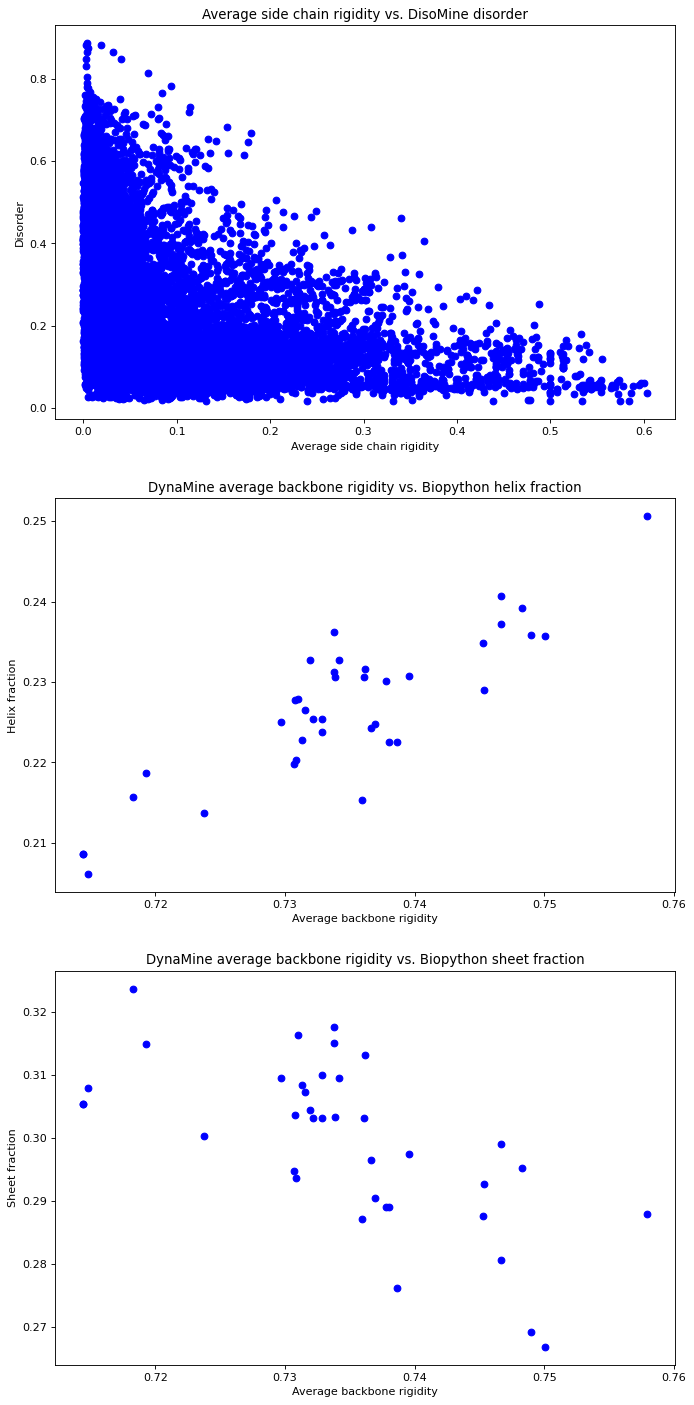

In [28]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# 
# Make a large plot to put subplots into
# 

fig = plt.figure(figsize=(10, 30), dpi= 80, facecolor='w', edgecolor='k')

#
# 1. Check the per-residue dynamine backbone values against the per-residue disomine (disorder) propensity values
#

# Here we make a single list of all residues in all proteins out of the
# list of values per protein that is now available from the pandas dataframe we made
allDynaMineValues = sum(proteinData['sidechain'].values.tolist(),[]) 
allDisorderValues = sum(proteinData['disomine'].values.tolist(),[])

# Add a subplot to the main plot - see matplotlib documentation online for more examples/info
# should you want to customise this
axes = fig.add_subplot(411)
# Make a scatter plot
axes.scatter(allDynaMineValues, allDisorderValues, color="b") 
axes.set_title("Average side chain rigidity vs. DisoMine disorder")
axes.set_xlabel("Average side chain rigidity")
axes.set_ylabel("Disorder")

#
# You can see that higher disorder corresponds to lower backbone rigidity (more flexibility)
# It's also possible to calculate the correlation and p-value on this with the numpy package
# From that value you can see that we can be sure of this correlation (low p-value) while
# there is a negative correlation (higher rigidity, lower disorder!)
#

print(stats.pearsonr(allDynaMineValues,allDisorderValues))

#
# 2. Check the average dynamine backbone flexibility of the protein against the
#    biopython instability
#

# Here we take the mean over all residues for the protein, and make a list of all those mean values
perProteinMeanDynaMineValues = [numpy.mean(backboneValuesPerProtein) for backboneValuesPerProtein in proteinData['backbone'].values.tolist()]
perProteinStabilityValues = proteinData['helixFraction'].values.tolist()

axes = fig.add_subplot(412)
axes.scatter(perProteinMeanDynaMineValues, perProteinStabilityValues, color="b")
axes.set_title("DynaMine average backbone rigidity vs. Biopython helix fraction")
axes.set_xlabel("Average backbone rigidity")
axes.set_ylabel("Helix fraction")

#
# 3. Check the average dynamine backbone flexibility of the protein against the
#    biopython instability
#

# Here we take the mean over all residues for the protein, and make a list of all those mean values
perProteinMeanDynaMineValues = [numpy.mean(backboneValuesPerProtein) for backboneValuesPerProtein in proteinData['backbone'].values.tolist()]
perProteinStabilityValues = proteinData['sheetFraction'].values.tolist()

axes = fig.add_subplot(413)
axes.scatter(perProteinMeanDynaMineValues, perProteinStabilityValues, color="b")
axes.set_title("DynaMine average backbone rigidity vs. Biopython sheet fraction")
axes.set_xlabel("Average backbone rigidity")
axes.set_ylabel("Sheet fraction")

#
# In my case, there is also a negative correlation, but it's not significant (high p value). You might have
# a better correlation for your proteins.
#

print(stats.pearsonr(perProteinMeanDynaMineValues,perProteinStabilityValues))

## 2.3 Comparing secondary structure of subsets

Helix: MannwhitneyuResult(statistic=62.0, pvalue=0.024180871696451382)
Sheet: MannwhitneyuResult(statistic=78.0, pvalue=0.08321472672945551)


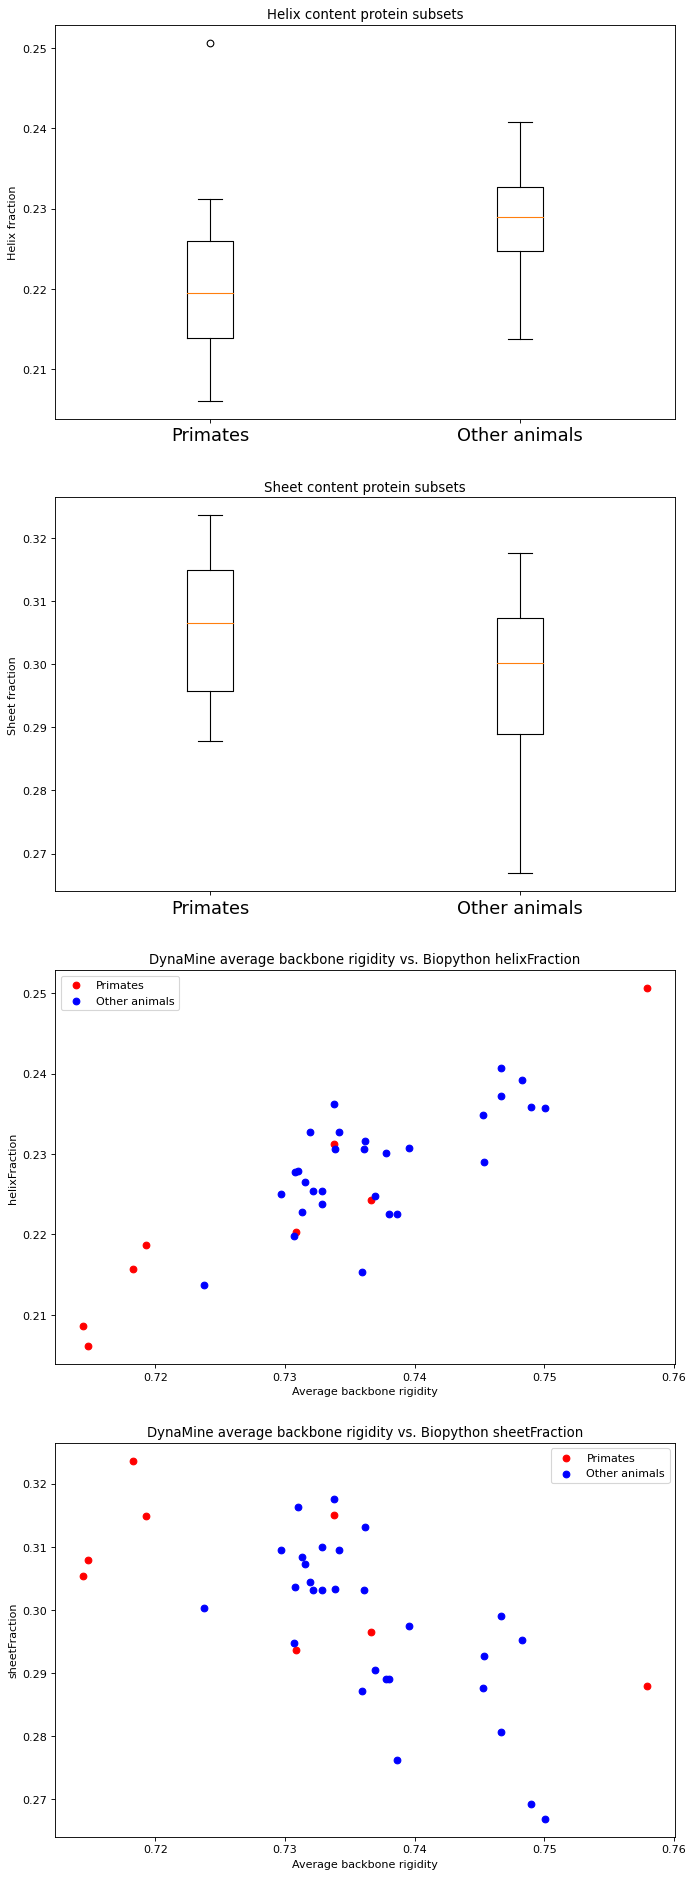

In [21]:
# 
# Make a large plot to put subplots into
# 

fig = plt.figure(figsize=(10, 30), dpi= 80, facecolor='w', edgecolor='k')

# 1. Check the distribution of the helix content for two subsets of proteins
#    These subsets might come from clustering of the distances between sequences, for example, or from
#    another subset (e.g. isoelectric point)


# These subsets of protein ID lists you have to generete yourself based on clustering, via SPSS or via a label such as organism
proteinID_subset1 = ['P04637','P56423','A0A2K5RMZ8','A0A1U7U5H4','J3KP33','A0A2I2Y7Z8','A0A2I3MD32','A0A2I3NCU7']
proteinID_subset2 = ['O36006','Q95330','A0A2R8MYD9','A0A0K1TP12','G5B5D6','A0A250YHC8','A0A172Q425','H0XGB0','Q9TUB2','P41685','A0A671EZ36','Q29537','L8IPI8','P67939','Q9WUR6','P51664','A0A5N3X1K5','A0A2Y9R5B9','O09185','F6TL72','A0A452QA89','L5JZ91','A0A1S3EYC1','P10361','A0A4X1V650','P02340','Q920Y0','A0A1U9W5F4','Q9TTA1']


# Here we get the value per protein (uniprot) ID in each subset, so the values in
# helix_subset1 correspond to the helix fractions in the proteinID_subset1 list,
# the helix_subset2 values to the ones in proteinID_subset2
helix_subset1 = [proteinData.loc[proteinID]['helixFraction'] for proteinID in proteinID_subset1]
sheet_subset1 = [proteinData.loc[proteinID]['sheetFraction'] for proteinID in proteinID_subset1]
backbone_subset1 = [proteinData.loc[proteinID]['backbone'] for proteinID in proteinID_subset1]

helix_subset2 = [proteinData.loc[proteinID]['helixFraction'] for proteinID in proteinID_subset2]
sheet_subset2 = [proteinData.loc[proteinID]['sheetFraction'] for proteinID in proteinID_subset2]
backbone_subset2 = [proteinData.loc[proteinID]['backbone'] for proteinID in proteinID_subset2]

# We now make a list of these separate lists in order to plot it in matplotlib
distributionDataHelix = [helix_subset1,helix_subset2]
distributionDataSheet = [sheet_subset1,sheet_subset2]

axes = fig.add_subplot(411)
# This adds a boxplot
axes.boxplot(distributionDataHelix)
axes.set_title("Helix content protein subsets")
axes.set_ylabel("Helix fraction")
# Here we label the boxplots on the x-axis
axes.set_xticklabels(['Primates','Other animals'],fontsize=16)

#Now the same for the sheet fraction

axes = fig.add_subplot(412)
# This adds a boxplot
axes.boxplot(distributionDataSheet)
axes.set_title("Sheet content protein subsets")
axes.set_ylabel("Sheet fraction")
# Here we label the boxplots on the x-axis
axes.set_xticklabels(['Primates','Other animals'],fontsize=16)

#
# 2. Check the average dynamine backbone flexibility of the protein against the
#    biopython helix and sheet fractions
#

perProteinMeanDynaMineValues1 = [numpy.mean(backboneValuesPerProtein) for backboneValuesPerProtein in backbone_subset1]
perProteinMeanDynaMineValues2 = [numpy.mean(backboneValuesPerProtein) for backboneValuesPerProtein in backbone_subset2]

axes = fig.add_subplot(413)
axes.scatter(perProteinMeanDynaMineValues1, helix_subset1, color="r", label="Primates")
axes.scatter(perProteinMeanDynaMineValues2, helix_subset2, color="b", label="Other animals")
axes.set_title("DynaMine average backbone rigidity vs. Biopython helixFraction")
axes.set_xlabel("Average backbone rigidity")
axes.set_ylabel("helixFraction")
axes.legend()

axes = fig.add_subplot(414)
axes.scatter(perProteinMeanDynaMineValues1, sheet_subset1, color="r", label="Primates")
axes.scatter(perProteinMeanDynaMineValues2, sheet_subset2, color="b", label="Other animals")
axes.set_title("DynaMine average backbone rigidity vs. Biopython sheetFraction")
axes.set_xlabel("Average backbone rigidity")
axes.set_ylabel("sheetFraction")
axes.legend()

#
# We can also compare their distributions with many tests, here using a Mann-Whitney non-parametric test
#

print("Helix:",stats.mannwhitneyu(helix_subset1,helix_subset2))
print("Sheet:", stats.mannwhitneyu(sheet_subset1,sheet_subset2))

Backbone: MannwhitneyuResult(statistic=61.0, pvalue=0.022177584536533602)


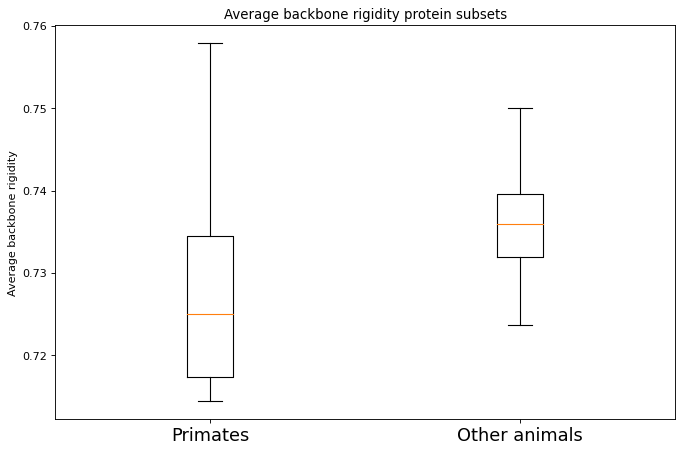

In [26]:
fig = plt.figure(figsize=(10, 30), dpi= 80, facecolor='w', edgecolor='k')

axes = fig.add_subplot(411)
# This adds a boxplot
axes.boxplot([perProteinMeanDynaMineValues1,perProteinMeanDynaMineValues2])
axes.set_title("Average backbone rigidity protein subsets")
axes.set_ylabel("Average backbone rigidity")
# Here we label the boxplots on the x-axis
axes.set_xticklabels(['Primates','Other animals'],fontsize=16)

print("Backbone:", stats.mannwhitneyu(perProteinMeanDynaMineValues1,perProteinMeanDynaMineValues2))

## 2.4 Comparing disordered regions of subsets

(-0.4090272397883791, 1.5903593387932123e-121)
(-0.44597899291804355, 0.0)


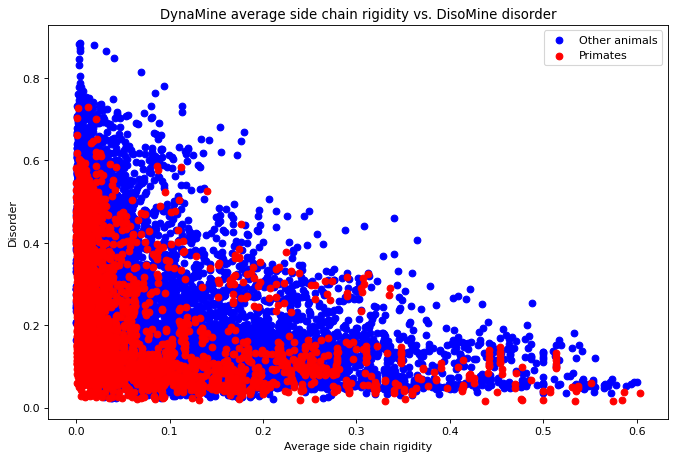

In [29]:
#Make a plot
fig = plt.figure(figsize=(10, 30), dpi= 80, facecolor='w', edgecolor='k')

#Make subsets
sidechain_subset1 = [proteinData.loc[proteinID]['sidechain'] for proteinID in proteinID_subset1]
disomine_subset1 = [proteinData.loc[proteinID]['disomine'] for proteinID in proteinID_subset1]

sidechain_subset2 = [proteinData.loc[proteinID]['sidechain'] for proteinID in proteinID_subset2]
disomine_subset2 = [proteinData.loc[proteinID]['disomine'] for proteinID in proteinID_subset2]

#Make a scatter plot
axes = fig.add_subplot(411)

'''
#Find mean value for sidechain and disomine of each protein in two clusters
perProteinMeanSidechain1 = [numpy.mean(sidechainValuesPerProtein) for sidechainValuesPerProtein in sidechain_subset1]
perProteinMeanSidechain2 = [numpy.mean(sidechainValuesPerProtein) for sidechainValuesPerProtein in sidechain_subset2]
perProteinMeanDisoMine1 = [numpy.mean(disomineValuesPerProtein) for disomineValuesPerProtein in disomine_subset1]
perProteinMeanDisoMine2 = [numpy.mean(disomineValuesPerProtein) for disomineValuesPerProtein in disomine_subset2]
'''
perProteinSumSidechain1 = list(sum(sidechain_subset1,[]))
perProteinSumSidechain2 = list(sum(sidechain_subset2,[]))
perProteinSumDisoMine1 = list(sum(disomine_subset1,[]))
perProteinSumDisoMine2 = list(sum(disomine_subset2,[]))

axes.scatter(perProteinSumSidechain2, perProteinSumDisoMine2, color="b", label="Other animals")
axes.scatter(perProteinSumSidechain1, perProteinSumDisoMine1, color="r", label="Primates")

axes.set_title("DynaMine average side chain rigidity vs. DisoMine disorder")
axes.set_xlabel("Average side chain rigidity")
axes.set_ylabel("Disorder")

axes.legend()

#Pearson correlation
print(stats.pearsonr(perProteinSumSidechain1, perProteinSumDisoMine1))
print(stats.pearsonr(perProteinSumSidechain2, perProteinSumDisoMine2))

## 2.5 Heat map

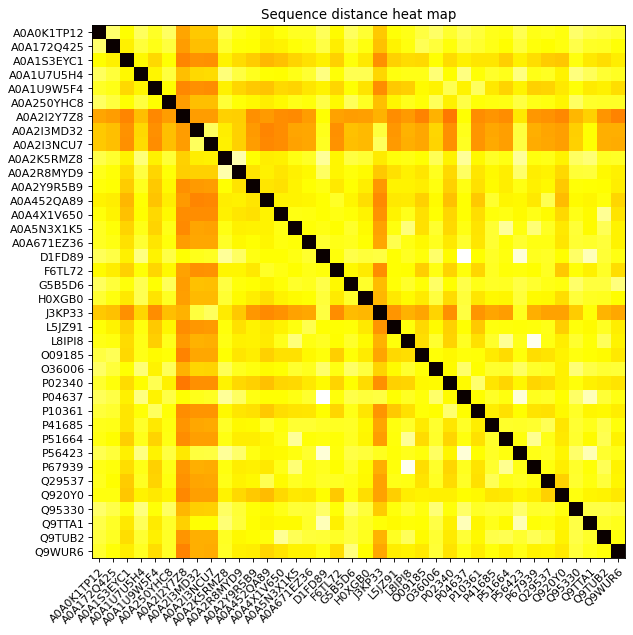

In [10]:
import scipy.stats as stats
import numpy
import matplotlib.pyplot as plt
 
# Make a large plot to put subplots into
fig = plt.figure(figsize=(10, 30), dpi= 80, facecolor='w', edgecolor='k')

#
# 2. Heat map of the sequence distances
#

axes = fig.add_subplot(311)

# First make pandas matrix, convert to numpy, send to matplotlib
distanceMatrix_pandas = pd.DataFrame()

# Make sure we stick to the correct uniprot ID order!
for uniprotID1 in uniprotKeys:
    dataValues = []
    for uniprotID2 in uniprotKeys:
        if uniprotID1 == uniprotID2:
            value = 0
        else:
            value = seqDistData[uniprotID1][uniprotID2]
        dataValues.append(value)
        
    distanceMatrix_pandas[uniprotID1] = dataValues

distanceMatrix_numpy = distanceMatrix_pandas.to_numpy()

axes.imshow(distanceMatrix_numpy, cmap='hot', interpolation='nearest')
axes.set_title("Sequence distance heat map")
axes.set_xticks(numpy.arange(len(uniprotKeys)))
axes.set_yticks(numpy.arange(len(uniprotKeys)))
axes.set_xticklabels(uniprotKeys)
axes.set_yticklabels(uniprotKeys)
plt.setp(axes.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

print()